In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# a little bit of extra steps bc the error in the log messes the spacing
url = []
status = []
start = []
end = []
size = []
with open('response.log', 'r') as f:
    for line in f:
        data = line.split()
        url.append(data[3])
        status.append(data[4])
        start.append(data[5])
        end.append(data[6])
        size.append(data[7])

df = pd.DataFrame({'url': url, 'status' : status, 'start' : start, 'end' : end, 'size' : size})
df = df[df.status != "<nil>"]
df = df[1:]

url = df[["url"]]
df = df.drop("url", axis = 1).astype(int)
df[["url"]] = url


In [61]:
# mean byte size
sum(df["size"]) / len(df)

203191.83516483515

In [66]:
# calculate responsetime
df["responseTime"] = df["end"] - df["start"]

6        813500000
7        832691000
8        832599000
9        810890000
10       845565000
          ...     
191    16620546000
192    16601103000
193    16684241000
194    16663772000
200      366750000
Name: responseTime, Length: 182, dtype: int64

Text(0.5, 1.0, 'Line Plot of HTTP Request Times')

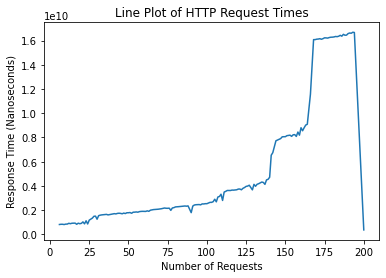

In [69]:
# plot the responseTime 
# (I was a bit confused what I was suppose to be plotting the request time against, hope this is okay)
df["responseTime"].plot(kind = "line")
plt.xlabel("Request Number")
plt.ylabel("Response Time (Nanoseconds)")
plt.title("Line Plot of HTTP Request Times")

In [73]:
def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y
a, b = cdf(df["responseTime"])
sorteddf = pd.DataFrame({'responseTime' : a, "percentile" : b})

In [74]:
percentiles = [50, 70, 75, 80, 85, 90, 95, 99]
# calcalutes discrete results using cdf values
nums = []
for i in percentiles:
    x = np.where(sorteddf.percentile > i / 100)[0][0]
    nums.append(sorteddf["responseTime"][x])
print(nums)

# interpolates results
np.percentile(df["responseTime"], q=percentiles)


[2531417000, 4249317000, 7847042000, 8189283000, 11570418000, 16217267000, 16358905000, 16663772000]


array([2.52290550e+09, 4.22911500e+09, 7.81648225e+09, 8.18898360e+09,
       1.11978592e+10, 1.62156267e+10, 1.63586975e+10, 1.66287589e+10])